#### Instructions

Load the Online Retail II dataset and clean the data by removing incomplete entries.   

Preprocess the data by encoding categorical data and scaling numerical features to normalize the range of data values.  

Transform the data into a suitable format where each customer's shopping habits over time are captured in a binary format—purchased or not purchased.  

Train your Boltzmann machine using the training set with the goal of learning the underlying probability distribution of the data.


In [20]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
# Loading data
df = pd.read_excel('online_retail_II.xlsx')  
display(df.head())

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [47]:

# check df size before and after removing incomplete entries (na rows)
print("Length of raw data", len(df))
display(df.isna().sum())
df_cleaned = df.dropna(subset=['Description', 'Customer ID'])

print("Length after removing na rows", len(df_cleaned))
display(df_cleaned.isna().sum())

Length of raw data 525461


Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

Length after removing na rows 417534


Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [49]:
# Scale the data
scaler = StandardScaler()
df_cleaned.loc[:, ['Quantity', 'Price']] = df_cleaned[['Quantity', 'Price']].astype(float)
df_cleaned.loc[:, ['Quantity', 'Price']] = scaler.fit_transform(df_cleaned[['Quantity', 'Price']])

# Label encoding for StockCode and Customer ID
label_encoder = LabelEncoder()
df_cleaned.loc[:, 'StockCode'] = label_encoder.fit_transform(df_cleaned['StockCode'].astype(str))
df_cleaned.loc[:, 'Customer ID'] = label_encoder.fit_transform(df_cleaned['Customer ID'].astype(str))

# one hot encode the countries - not used
countries_encoded_df = pd.get_dummies(df_cleaned['Country'], columns=['Country'], dtype=float)
display(countries_encoded_df.head())

# Convert InvoiceDate to datetime
df_cleaned.loc[:, 'InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Create a binary column indicating purchase
df_cleaned.loc[:, 'Purchased'] = 1

# Could combine countries into this dataset but not needed
# df_combined = pd.concat([df_cleaned, countries_encoded_df], axis=1)
df_combined = pd.concat([df_cleaned], axis=1)
display(df_combined.head())

,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Denmark,EIRE,...,Singapore,Spain,Sweden,Switzerland,Thailand,USA,United Arab Emirates,United Kingdom,Unspecified,West Indies
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Purchased
0,489434,2695,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-0.007497,2009-12-01 07:45:00,0.043053,3837.0,United Kingdom,1
1,489434,1936,PINK CHERRY LIGHTS,-0.007497,2009-12-01 07:45:00,0.040242,3837.0,United Kingdom,1
2,489434,1938,WHITE CHERRY LIGHTS,-0.007497,2009-12-01 07:45:00,0.040242,3837.0,United Kingdom,1
3,489434,289,"RECORD FRAME 7"" SINGLE SIZE",0.348163,2009-12-01 07:45:00,-0.025130,3837.0,United Kingdom,1
4,489434,3607,STRAWBERRY CERAMIC TRINKET BOX,0.111057,2009-12-01 07:45:00,-0.037080,3837.0,United Kingdom,1


In [17]:

# Pivot the table
df_pivot = df_combined.pivot_table(index=['Customer ID', 'InvoiceDate'], columns='StockCode', values='Purchased', fill_value=0)
df_pivot.reset_index(inplace=True)

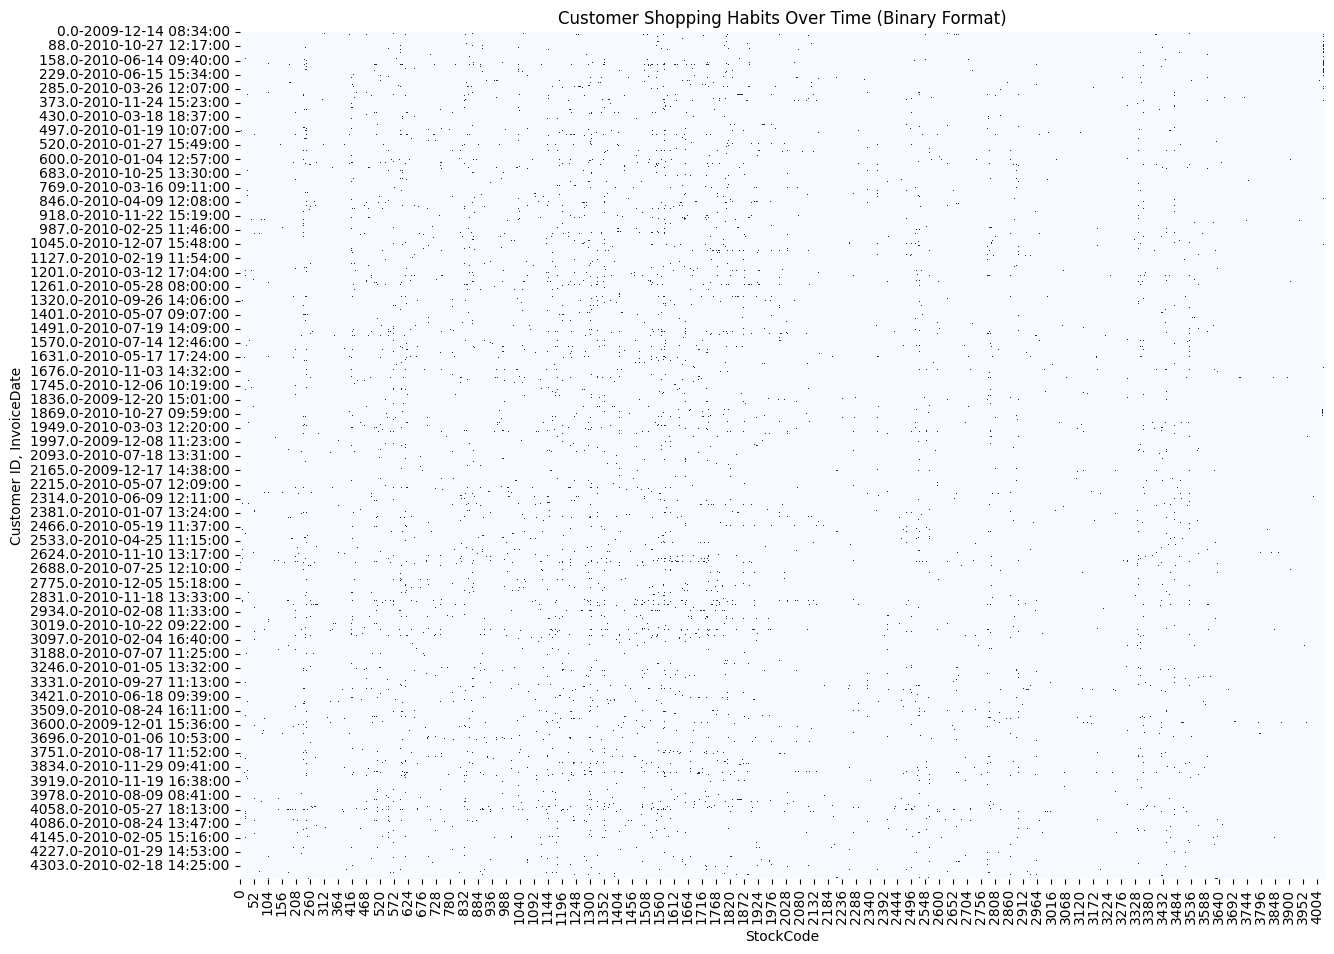

In [18]:
# Creating view so you can see which items were purchased on what data by which customer id
plt.figure(figsize=(14, 11))
sns.heatmap(df_pivot.set_index(['Customer ID', 'InvoiceDate']), cmap='Blues', cbar=False)
plt.title('Customer Shopping Habits Over Time (Binary Format)')
plt.xlabel('StockCode')
plt.ylabel('Customer ID, InvoiceDate')
plt.xticks(rotation=90)
plt.show()

In [21]:
# Sorting 
df_pivot.sort_values(by=['InvoiceDate', 'Customer ID'], inplace=True)
df_pivot.set_index(['Customer ID', 'InvoiceDate'], inplace=True)
display(df_pivot.head())

StockCode                        0     1     2     3     4     5     6     \
Customer ID InvoiceDate                                                     
507.0       2009-12-01 07:45:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
            2009-12-01 07:46:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
500.0       2009-12-01 09:06:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2197.0      2009-12-01 09:08:00   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
4254.0      2009-12-01 09:24:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

StockCode                        7     8     9     ...  4021  4022  4023  \
Customer ID InvoiceDate                            ...                     
507.0       2009-12-01 07:45:00   0.0   0.0   0.0  ...   0.0   0.0   0.0   
            2009-12-01 07:46:00   0.0   0.0   0.0  ...   0.0   0.0   0.0   
500.0       2009-12-01 09:06:00   0.0   0.0   0.0  ...   0.0   0.0   0.0   
2197.0      2009-12-01 09:08:00   0.0   0.0   0.0  ...   0.0   0.0   0.0   
4254.0      2009-12-01 09:24:00   0.0   0.0   0.0  ...   0.0   0.0   0.0   

StockCode                        4024  4025  4026  4027  4028  4029  4030  
Customer ID InvoiceDate                                                    
507.0       2009-12-01 07:45:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
            2009-12-01 07:46:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
500.0       2009-12-01 09:06:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2197.0      2009-12-01 09:08:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4254.0      2009-12-01 09:24:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 4031 columns]

In [22]:
data = df_pivot.to_numpy()

# Define RBM model
class RBM(tf.keras.Model):
    def __init__(self, n_visible, n_hidden):
        super(RBM, self).__init__()
        self.n_visible = n_visible
        self.n_hidden = n_hidden
        self.W = tf.Variable(tf.random.normal([self.n_visible, self.n_hidden], stddev=0.01), name='W')
        self.bh = tf.Variable(tf.zeros([self.n_hidden]), name='bh')
        self.bv = tf.Variable(tf.zeros([self.n_visible]), name='bv')

    def call(self, v):
        h_prob = tf.nn.sigmoid(tf.matmul(v, self.W) + self.bh)
        h_sample = tf.nn.relu(tf.sign(h_prob - tf.random.uniform(tf.shape(h_prob))))
        v_prob = tf.nn.sigmoid(tf.matmul(h_sample, tf.transpose(self.W)) + self.bv)
        v_sample = tf.nn.relu(tf.sign(v_prob - tf.random.uniform(tf.shape(v_prob))))
        return v_sample

    def free_energy(self, v):
        vbias_term = tf.reduce_sum(tf.matmul(v, tf.reshape(self.bv, [-1, 1])), axis=0)
        hidden_term = tf.reduce_sum(tf.nn.softplus(tf.matmul(v, self.W) + self.bh), axis=1)
        return -hidden_term - vbias_term

In [32]:
# hyper parameters
print("data shape", data.shape)
n_visible = data.shape[1]  # Number of visible units (input pixels)
n_hidden = 500  # Number of hidden units
learning_rate = 0.01  # Learning rate for the optimizer
epochs = 15
batch_size = 100


# initialize RBM model
rbm = RBM(n_visible, n_hidden)
optimizer = tf.optimizers.Adam(learning_rate)

data shape (23489, 4031)


In [33]:
# Training the RBM
for epoch in range(epochs):
    np.random.shuffle(data)
    for i in range(0, data.shape[0], batch_size):
        batch = data[i:i + batch_size]
        with tf.GradientTape() as tape:
            v0 = tf.constant(batch, dtype=tf.float32)
            vk = rbm.call(v0)
            cost = tf.reduce_mean(rbm.free_energy(v0)) - tf.reduce_mean(rbm.free_energy(vk))
        gradients = tape.gradient(cost, rbm.trainable_variables)
        if any([grad is not None for grad in gradients]):  # Ensure gradients are not None
            optimizer.apply_gradients(zip(gradients, rbm.trainable_variables))
    print(f'Epoch {epoch + 1}, cost: {cost.numpy()}')


# Evaluate the RBM
def get_hidden_representation(rbm, data):
    h_prob = tf.nn.sigmoid(tf.matmul(data, rbm.W) + rbm.bh)
    return h_prob

hidden_representation = get_hidden_representation(rbm, tf.constant(data, dtype=tf.float32))
print("Hidden Representation:\n", hidden_representation.numpy())


Epoch 1, cost: 24.159912109375
Epoch 2, cost: 24.025787353515625
Epoch 3, cost: 23.505126953125
Epoch 4, cost: 24.52642822265625
Epoch 5, cost: 24.352813720703125
Epoch 6, cost: 24.1253662109375
Epoch 7, cost: 23.56646728515625
Epoch 8, cost: 23.3311767578125
Epoch 9, cost: 25.0152587890625
Epoch 10, cost: 24.40155029296875
Epoch 11, cost: 24.00445556640625
Epoch 12, cost: 24.3076171875
Epoch 13, cost: 24.130340576171875
Epoch 14, cost: 24.614227294921875
Epoch 15, cost: 24.045196533203125
Hidden Representation:
 [[0.50214696 0.4920487  0.49389005 ... 0.49046084 0.48896426 0.5005969 ]
 [0.5088074  0.5053996  0.48861858 ... 0.49674255 0.50034726 0.4888711 ]
 [0.48800838 0.49660367 0.4965656  ... 0.49583906 0.50168264 0.49081144]
 ...
 [0.5012542  0.49539226 0.5232629  ... 0.4887574  0.51401263 0.5093053 ]
 [0.50801253 0.49335086 0.49051273 ... 0.49767795 0.49509087 0.50730383]
 [0.48100224 0.51702815 0.52045923 ... 0.47732893 0.513477   0.4868288 ]]
